### Logistic Regression
- linear model 기반으로 clasification
- target이 categorical feature인 경우에 적용
- 결과를 확률로 변환해서 처리
- 종류
    - binary classification
    - multi classification

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# 판다스에서 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
# 넘파이에서 지수표기법 설정: 6자리
np.set_printoptions(precision=6, suppress=True)

In [5]:
FILE_PATH = '../data/fish.csv'
fish_df = pd.read_csv(FILE_PATH)
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,29.00000,34.00000,12.44400,5.13400


In [7]:
# label의 class 수
pd.unique(fish_df['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
feature_df = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# feature_df = fish_df[fish_df.columns[1:]].to_numpy()
feature_df[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [11]:
label_sr = fish_df['Species'].to_numpy()
label_sr[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [12]:
# train : test = 7 : 3
# stratify = label_sr
# random_state = 15
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, test_size=0.3, random_state=15, stratify=label_sr)

In [13]:
# standard scaling
from sklearn.preprocessing import StandardScaler

In [14]:
sd_scaler = StandardScaler()
sd_scaler.fit(X_train, y_train)

sd_X_train = sd_scaler.transform(X_train)
sd_X_test = sd_scaler.transform(X_test)

- model selection
    - learning method: supervised learning classification
    - learning algorithm: logistic regression
        - feature에 weight를 곱한 후 합계한 결과를 probability value로 변환

In [18]:
def sigmoid(data):
    return 1 / (1 + np.exp(-data))

In [19]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
sig = sigmoid(z)

print(f"z => {z}\nphi = {phi}")
print(f"sigmoid = {sig}")

z => [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]
phi = [0.006693 0.007392 0.008163 0.009013 0.009952 0.010987 0.012128 0.013387
 0.014774 0.016302 0.017986 0.01984  0.021881 0.024127 0.026597 0.029312
 0.032295 0.035571 0.039166 0.043107 0.047426 0.052154 0.057324 0.062973
 0.069138 0.075858 0.083173 0.091123 0.09975  0.109097 0.119203 0.130108
 0.141851 0.154465 0.167982 0.182426 0.197816 0.214165 0.231475 0.24974
 0.268941 0.28905  0.310026 0.331812 0.354344 0.377541 0.401312 0.425557
 0.450166 0.475021 0.5      0.524979 0.5498

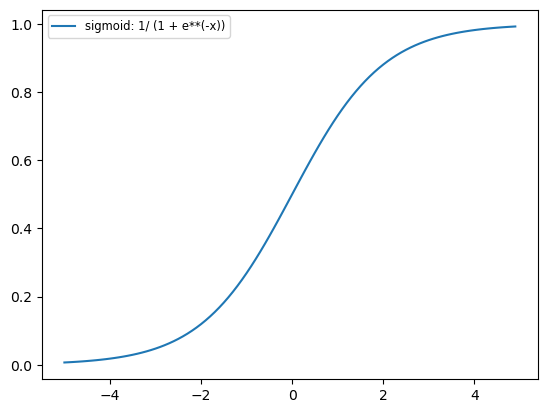

In [23]:
plt.plot(z, sig, label='sigmoid: 1/ (1 + e**(-x))')
plt.legend(fontsize='small')
plt.show()

In [34]:
# binary classification
mask1 = (y_train == 'Bream') | (y_train == 'Smelt')
mask2 = (y_test == 'Bream') | (y_test == 'Smelt')

X_train_bream_smelt = sd_X_train[mask1]
y_train_bream_smelt = y_train[mask1]
X_test_bream_smelt = sd_X_test[mask2]
y_test_bream_smelt = y_test[mask2]

In [25]:
# model instance
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_bream_smelt, y_train_bream_smelt)

LogisticRegression()

In [31]:
# After learning
weight = lr_model.coef_[0]
bais = lr_model.intercept_

print(f"claeese_: {lr_model.classes_}, {len(lr_model.classes_)}개")
print(f"n_features_in_: {lr_model.n_features_in_}")
print(f"n_iter_: {lr_model.n_iter_}")
print(f"coef_: {weight}, {len(lr_model.coef_[0])}개")
print(f"intercept_: {bais}")

claeese_: ['Bream' 'Smelt'], 2개
n_features_in_: 5
n_iter_: [13]
coef_: [-0.427887 -0.592965 -0.66976  -0.979895 -0.778889], 5개
intercept_: [-1.921427]


In [35]:
# model preformance
# train과 test의 score, accuracy
# 본래는 validation data
train_score = lr_model.score(X_train_bream_smelt, y_train_bream_smelt)
test_score = lr_model.score(X_test_bream_smelt, y_test_bream_smelt)

print(f"train score: {train_score*100:.2f} %")
print(f"test score: {test_score*100:.2f} %")

train score: 100.00 %
test score: 100.00 %


- test
    - predict(): 예측 클래스 변환
    - predict_proba(): 각 클래스별 확률값
    - decision_function: feature와 weight + bias 한 결과값

In [36]:
lr_model.predict(X_train_bream_smelt[:5])

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Bream'], dtype=object)

In [37]:
lr_model.predict_proba(X_train_bream_smelt[:5])

array([[0.999062, 0.000938],
       [0.979142, 0.020858],
       [0.99166 , 0.00834 ],
       [0.027335, 0.972665],
       [0.998773, 0.001227]])

In [38]:
print(lr_model.classes_, lr_model.predict_proba(X_train_bream_smelt[:5]), sep='\n')

['Bream' 'Smelt']
[[0.999062 0.000938]
 [0.979142 0.020858]
 [0.99166  0.00834 ]
 [0.027335 0.972665]
 [0.998773 0.001227]]


In [42]:
# y = weight[0]*X[0] + weight[1]*x[1] + weight[2]*x[2] + weight[3]*x[3] + weight[4]*x[4] + bais
decisons = lr_model.decision_function(X_train_bream_smelt[:5])
decisons

array([-6.970669, -3.848953, -4.778279,  3.571878, -6.70155 ])

In [41]:
from scipy.special import expit

print(expit(decisons))  # transform probability
# in case binary classification, positive label에 대한 확률값만 계산. 나머지는 1에서 뺌
print(lr_model.predict_proba(X_train_bream_smelt[:5]))

[0.000938 0.020858 0.00834  0.972665 0.001227]
[[0.999062 0.000938]
 [0.979142 0.020858]
 [0.99166  0.00834 ]
 [0.027335 0.972665]
 [0.998773 0.001227]]


In [51]:
lr_model_org = LogisticRegression(C=20, max_iter=1000)
lr_model_org.fit(sd_X_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [52]:
# After learning
weight_org = lr_model_org.coef_[0]
bais_org = lr_model_org.intercept_

print(f"claeese_: {lr_model_org.classes_}, {len(lr_model_org.classes_)}개")
print(f"n_features_in_: {lr_model_org.n_features_in_}")
print(f"n_iter_: {lr_model_org.n_iter_}")
print(f"coef_: {weight_org}, {len(lr_model_org.coef_[0])}개")
print(f"intercept_: {bais_org}")

claeese_: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'], 7개
n_features_in_: 5
n_iter_: [116]
coef_: [-1.469182 -0.851335  2.141843  7.709005 -0.184301], 5개
intercept_: [-0.110861 -0.126697  2.674875 -0.120021  1.767173 -6.964817  2.880348]


In [53]:
# model preformance
# train과 test의 score, accuracy
# 본래는 validation data
train_score = lr_model_org.score(sd_X_train, y_train)
test_score = lr_model_org.score(sd_X_test, y_test)

print(f"train score: {train_score*100:.2f} %")
print(f"test score: {test_score*100:.2f} %")

train score: 91.89 %
test score: 91.67 %


In [54]:
proba = lr_model_org.predict_proba(sd_X_test[:5])
print(proba, proba.max(axis=1), sep='\n\n')

[[0.000218 0.03055  0.29575  0.00292  0.617978 0.006269 0.046315]
 [0.995888 0.001728 0.       0.000005 0.000014 0.       0.002366]
 [0.000002 0.00594  0.86677  0.00012  0.112771 0.010771 0.003626]
 [0.000046 0.046356 0.609611 0.000581 0.313905 0.010603 0.018898]
 [0.003012 0.000002 0.974099 0.000946 0.001256 0.       0.020684]]

[0.617978 0.995888 0.86677  0.609611 0.974099]


In [55]:
lr_model_org.predict(sd_X_test[:5])

array(['Roach', 'Bream', 'Perch', 'Perch', 'Perch'], dtype=object)

- multi logistic regression 을 하려면 OvR이나 OvO를 해주면 됨.
- 이걸 이용해서 그래프를 그리는 것은 다른 이야기 인것 처럼 느껴짐.